In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import torch
import torchvision
import seaborn as sbb

root = os.path.dirname(os.getcwd())

In [2]:
def plot_wall(x):
    """Light-curves wall plot, function used during VAE training phase.
    Figure designed and ready to be appended to W&B logger.

    Parameters
    ----------
    xhat : numpy array
        Array of generated light curves
    x    : numpy array
        List of real light curves.
    epoch: int, optional
        Epoch number

    Returns
    -------
    fig
        a matplotlib figure
    image
        an image version of the figure
    """

    plt.close('all')
    ncols = 10
    fig, axis = plt.subplots(nrows=ncols, ncols=ncols, figsize=(ncols, ncols))
    for i, ax in enumerate(axis.ravel()):
        ax.imshow(x[i, 0, :, :], interpolation='bilinear',
                  cmap=cm.gray, origin='upper', aspect='equal')

    for ax in axis.ravel():
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
    fig.subplots_adjust(wspace=0.05, hspace=0.05)#, left=0, right=1)
    #plt.tight_layout()
    #fig.suptitle('Synthetic Images', fontsize=20, y=.95)
    plt.show()
    return

In [3]:
meta = np.load('%s/data/PPD/param_arr.npy' % (root))
meta = pd.DataFrame(meta, columns=['m_dust', 'Rc', 'f_exp', 'H0', 
                                   'Rin', 'sd_exp', 'a_max', 'inc'])
meta.head()

,m_dust,Rc,f_exp,H0,Rin,sd_exp,a_max,inc
0,1.000000e-07,100.0,1.15,5.0,0.1,0.0,10.0,90.0
1,1.000000e-07,100.0,1.15,5.0,0.1,-0.5,10.0,90.0
2,1.000000e-07,100.0,1.15,5.0,0.1,-1.0,10.0,90.0
3,1.000000e-07,100.0,1.15,5.0,1.0,-0.5,10.0,90.0
4,1.000000e-07,100.0,1.15,5.0,1.0,-1.0,10.0,90.0


In [4]:
imgs = np.load('%s/data/PPD/img_array.npy' % (root))
imgs = np.expand_dims(imgs, axis=1)

In [5]:
meta.shape, imgs.shape

((36518, 8), (36518, 1, 187, 187))

In [34]:
def random_rot(x, p=0.5):
    if np.random.uniform() >= p:
        return np.rot90(x, np.random.choice([0,1,2,3]), axes=[-2,-1])
    else:
        return x


def random_vertical_flip(x, p=0.5):
    if np.random.uniform() >= p:
        return np.flip(x, -2)
    else:
        return x


def standarize(x, mu=None, std=None):
    if not mu:
        mu = x.mean()
    if not std:
        std = x.std()
    return (x - mu) / std


def normalize(x, minim=None, maxim=None):
    if not minim:
        minim = x.min()
    if not maxim:
        maxim = x.max()
    return (x - minim) / (maxim - minim)

In [22]:
imgs_stand = standarize(imgs, mu=5.432005e-20, std=1.876213e-18)

In [35]:
imgs_norm = normalize(imgs, minim=0.0, maxim=5.9015464e-16)

In [38]:
np.save('%s/data/PPD/img_stand_array.npy' % (root), imgs_stand)
np.save('%s/data/PPD/img_norm_array.npy' % (root), imgs_norm)

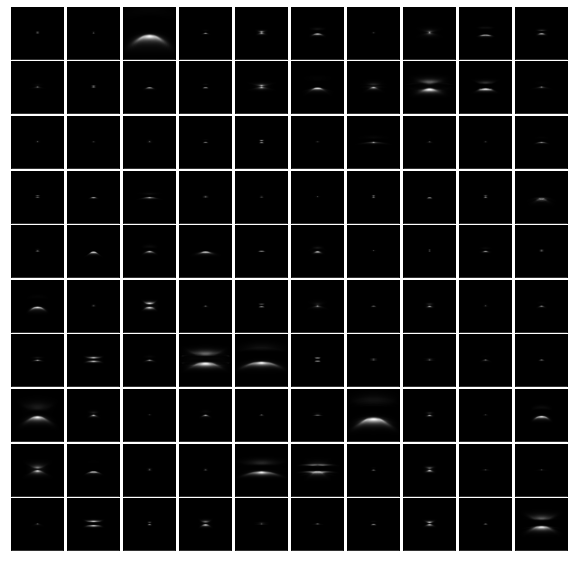

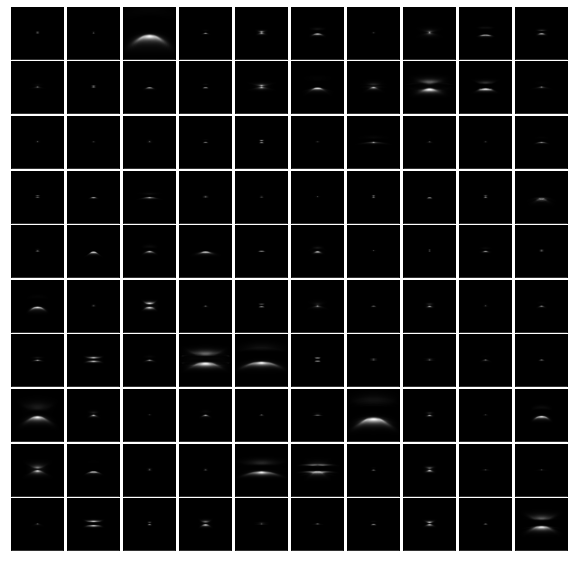

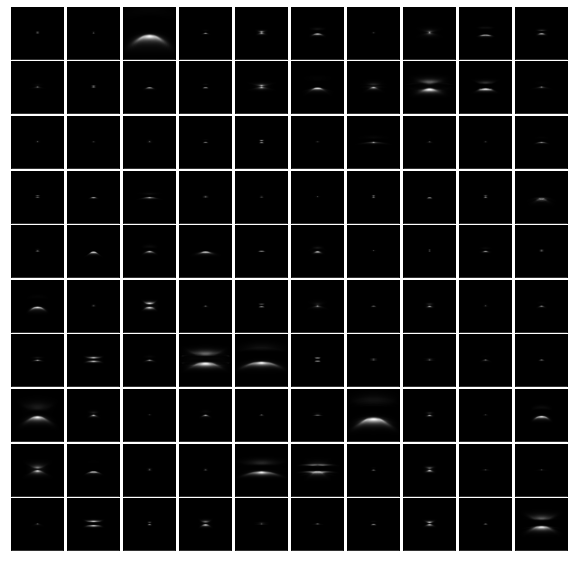

In [24]:
idx = np.random.randint(0, imgs.shape[0], size=100)
plot_wall(imgs[idx])
plot_wall(imgs_stand[idx])
plot_wall(imgs_norm[idx])

In [36]:
imgs_stand.mean(), imgs_stand.std()

(2.2326908e-06, 0.9999677)

In [37]:
imgs_norm.min(), imgs_norm.max()

(0.0, 6.710546)

In [17]:
imgs_log = np.log10(imgs)

<ipython-input-17-9c6eb8901068>:1: RuntimeWarning: divide by zero encountered in log10
  imgs_log = np.log10(imgs)


In [19]:
imgs_log.min(), imgs_log.max()

(-inf, -14.402276)

In [21]:
imgs_log[~np.isinf(imgs_log)].min()

-38.531837

In [18]:
imgs_log_ = imgs_log + 40.
imgs_log_[imgs_log_ == -np.inf] = 0.